# Machine Learning Modeling Notebook
---

## Import Depedencies

In [12]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, LayerNormalization, Dropout, Activation

## Load Data

### Train Data

In [3]:
x_train_1 = np.load('x_train_1.npy')
print(x_train_1.shape)
x_train_2 = np.load('x_train_2.npy')
print(x_train_2.shape)

x_train = np.append(x_train_1, x_train_2, axis=0)
del x_train_1
del x_train_2

print(x_train.shape)

(37790, 30, 354)
(37791, 30, 354)
(75581, 30, 354)


In [4]:
y_train = np.load('y_train.npy')
y_train.shape

(75581, 250)

### Validation Data

In [5]:
x_val = np.load('x_val.npy')
x_val.shape

(9448, 30, 354)

In [6]:
y_val = np.load('y_val.npy')
y_val.shape

(9448, 250)

### Test Data
> **Important:** To save memory usage when training the model, load only the test data later when testing the model.

In [ ]:
x_test = np.load('x_test.npy')
x_test.shape

In [ ]:
y_test = np.load('y_test.npy')
y_test.shape

## Parameters

In [7]:
NUM_LABELS = 250
BATCH_SIZE = 64
LOG_DIR = os.path.join('Logs')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR)

## Modeling

### Build the Model

In [25]:
model = Sequential([
    Input(shape=(30, 354)),
    Dense(512),
    LayerNormalization(),
    Activation('relu'),
    Dropout(0.1),
    Dense(256),
    LayerNormalization(),
    Activation('relu'),
    Dropout(0.1),
    LSTM(384),
    Dense(250, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30, 512)           181760    
                                                                 
 layer_normalization (LayerN  (None, 30, 512)          1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 30, 512)           0         
                                                                 
 dropout (Dropout)           (None, 30, 512)           0         
                                                                 
 dense_1 (Dense)             (None, 30, 256)           131328    
                                                                 
 layer_normalization_1 (Laye  (None, 30, 256)          512       
 rNormalization)                                        

> **Important:** Run this cell below first, if you want to do the training or tuning again to free up memory

In [28]:
# Only this cell

tf.keras.backend.clear_session()
model.reset_states()

### Tune the Learning Rate

In [9]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.Adam()

In [10]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy())

In [11]:
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val, y_val),
                    epochs = 100, 
                    batch_size=BATCH_SIZE,
                    callbacks=[lr_schedule])

2023-05-12 07:13:17.433198: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3210680880 exceeds 10% of free system memory.
2023-05-12 07:13:21.265007: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3210680880 exceeds 10% of free system memory.


Epoch 1/100
1181/1181 [==============================] - 18s 12ms/step - loss: 5.5415 - val_loss: 5.5399 - lr: 1.0000e-08
Epoch 2/100
1181/1181 [==============================] - 13s 11ms/step - loss: 5.5413 - val_loss: 5.5397 - lr: 1.1220e-08
Epoch 3/100
1181/1181 [==============================] - 12s 11ms/step - loss: 5.5412 - val_loss: 5.5396 - lr: 1.2589e-08
Epoch 4/100
1181/1181 [==============================] - 13s 11ms/step - loss: 5.5412 - val_loss: 5.5395 - lr: 1.4125e-08
Epoch 5/100
1181/1181 [==============================] - 13s 11ms/step - loss: 5.5408 - val_loss: 5.5393 - lr: 1.5849e-08
Epoch 6/100
1181/1181 [==============================] - 13s 11ms/step - loss: 5.5407 - val_loss: 5.5392 - lr: 1.7783e-08
Epoch 7/100
1181/1181 [==============================] - 13s 11ms/step - loss: 5.5406 - val_loss: 5.5390 - lr: 1.9953e-08
Epoch 8/100
1181/1181 [==============================] - 13s 11ms/step - loss: 5.5404 - val_loss: 5.5388 - lr: 2.2387e-08
Epoch 9/100
1181/1181 [=

(1e-06, 0.001, 0.0, 10.0)

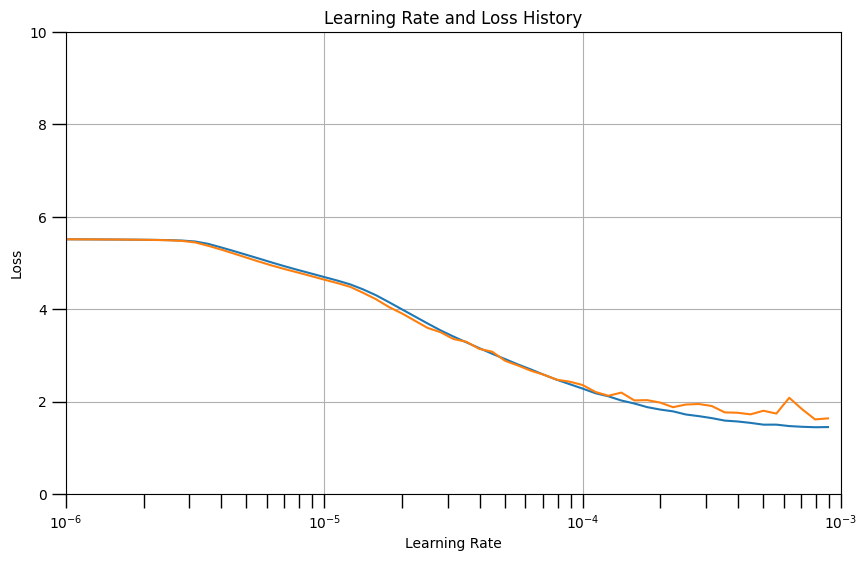

In [21]:
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

plt.figure(figsize=(10, 6))
plt.grid(True)

plt.semilogx(lrs, history.history["loss"])
plt.semilogx(lrs, history.history["val_loss"])

plt.tick_params('both', length=10, width=1, which='both')
plt.title("Learning Rate and Loss History")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

plt.axis([1e-6, 1e-3, 0, 10]) #plot boundaries

### Train the Model

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

In [27]:
model.fit(x_train,
          y_train,
          validation_data=(x_val, y_val),
          epochs = 100, 
          batch_size=BATCH_SIZE,
          callbacks=[tb_callback])

2023-05-12 07:52:44.824847: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3210680880 exceeds 10% of free system memory.
2023-05-12 07:52:48.746827: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3210680880 exceeds 10% of free system memory.


Epoch 1/100
1181/1181 [==============================] - 17s 13ms/step - loss: 5.4695 - categorical_accuracy: 0.0071 - val_loss: 5.1465 - val_categorical_accuracy: 0.0145
Epoch 2/100
1181/1181 [==============================] - 13s 11ms/step - loss: 4.7898 - categorical_accuracy: 0.0375 - val_loss: 4.4833 - val_categorical_accuracy: 0.0654
Epoch 3/100
1181/1181 [==============================] - 14s 12ms/step - loss: 4.2266 - categorical_accuracy: 0.0985 - val_loss: 3.8653 - val_categorical_accuracy: 0.1482
Epoch 4/100
1181/1181 [==============================] - 14s 12ms/step - loss: 3.6475 - categorical_accuracy: 0.1849 - val_loss: 3.4622 - val_categorical_accuracy: 0.2115
Epoch 5/100
1181/1181 [==============================] - 13s 11ms/step - loss: 3.2408 - categorical_accuracy: 0.2585 - val_loss: 3.1525 - val_categorical_accuracy: 0.2694
Epoch 6/100
1181/1181 [==============================] - 13s 11ms/step - loss: 2.9355 - categorical_accuracy: 0.3143 - val_loss: 2.8889 - val_cat

### Save Model

In [29]:
export_dir = 'saved_model'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


INFO:tensorflow:Assets written to: saved_model/1/assets
